In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [2]:
ls

sample_submission.csv  space_craft.ipynb  submission_1.csv  test.csv  train.csv


In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.shape

(8693, 14)

In [5]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Train data preprocessing

In [8]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Data Analysis

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

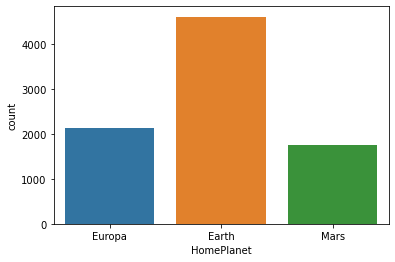

In [9]:

sns.countplot(x = 'HomePlanet', data=data)

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

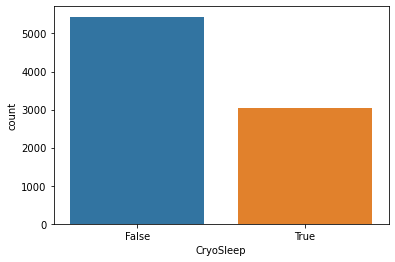

In [10]:
sns.countplot(x='CryoSleep', data=data)

<AxesSubplot:xlabel='Destination', ylabel='count'>

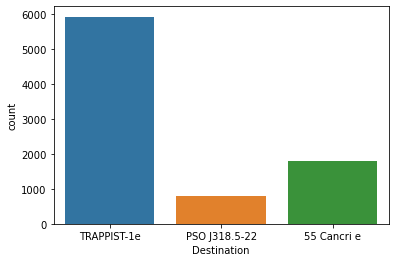

In [11]:
sns.countplot(x='Destination', data=data)

<AxesSubplot:xlabel='VIP', ylabel='count'>

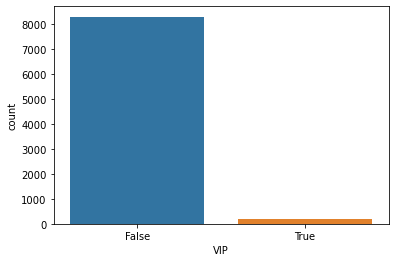

In [12]:
sns.countplot(x='VIP', data=data)

<AxesSubplot:xlabel='Transported', ylabel='count'>

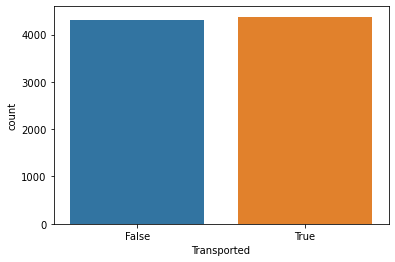

In [13]:
sns.countplot(x='Transported', data=data)

In [14]:
# Visualizing transported on the basis of every categorical attribute

<AxesSubplot:xlabel='Transported', ylabel='count'>

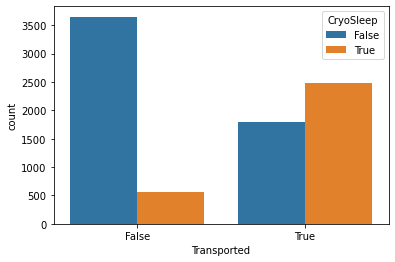

In [15]:
sns.countplot(x='Transported', hue='CryoSleep', data=data)

<AxesSubplot:xlabel='Transported', ylabel='count'>

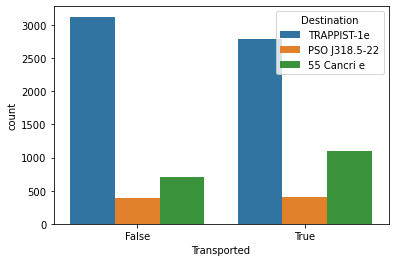

In [16]:
sns.countplot(x='Transported', hue='Destination', data=data)

<AxesSubplot:xlabel='Transported', ylabel='count'>

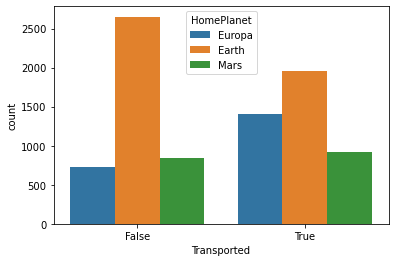

In [17]:
sns.countplot(x='Transported', hue='HomePlanet', data=data)

<AxesSubplot:xlabel='Transported', ylabel='count'>

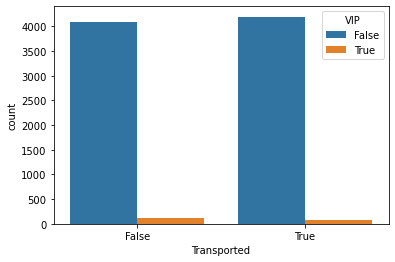

In [18]:
sns.countplot(x='Transported', hue='VIP', data=data)

# Check the null values

In [19]:
np.array(data.isnull().sum())

array([  0, 201, 217, 199, 182, 179, 203, 181, 183, 208, 183, 188, 200,
         0])

<AxesSubplot:>

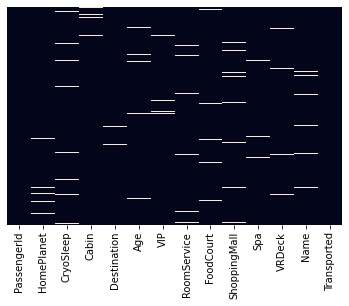

In [20]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

# Drop unuseful colums

In [21]:
train_drop = data.drop(['PassengerId', 'Name', 'Cabin'], axis=1)


In [22]:
train_drop.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [23]:
test_data = pd.read_csv('test.csv')

In [24]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [25]:
ID = test_data['PassengerId']

In [26]:
# drop the columns
test = test_data.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

In [27]:
test.shape

(4277, 10)

## Data preprocessing the null values

In [28]:
train_drop['Age'] = train_drop['Age'].fillna(train_drop['Age'].mean())
train_drop['RoomService'] = train_drop['RoomService'].fillna(train_drop['RoomService'].mean())
train_drop['FoodCourt'] = train_drop['FoodCourt'].fillna(train_drop['FoodCourt'].mean())
train_drop['ShoppingMall'] = train_drop['ShoppingMall'].fillna(train_drop['ShoppingMall'].mean())
train_drop['Spa'] = train_drop['Spa'].fillna(train_drop['Spa'].mean())
train_drop['VRDeck'] = train_drop['VRDeck'].fillna(train_drop['VRDeck'].mean())


<AxesSubplot:>

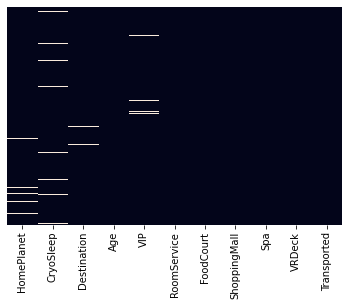

In [29]:
sns.heatmap(train_drop.isnull(), yticklabels=False, cbar=False)

In [30]:
train_drop['HomePlanet'] = train_drop['HomePlanet'].fillna(train_drop['HomePlanet'].mode()[0])
train_drop['CryoSleep'] = train_drop['CryoSleep'].fillna(train_drop['CryoSleep'].mode()[0])
train_drop['Destination'] = train_drop['Destination'].fillna(train_drop['Destination'].mode()[0])
train_drop['VIP'] = train_drop['VIP'].fillna(train_drop['VIP'].mode()[0])

<AxesSubplot:>

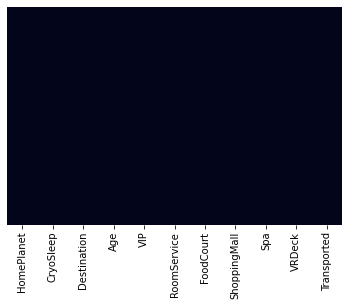

In [31]:
sns.heatmap(train_drop.isnull(), yticklabels=False, cbar=False)

In [32]:
test.isnull().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [33]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['RoomService'] = test['RoomService'].fillna(test['RoomService'].mean())
test['FoodCourt'] = test['FoodCourt'].fillna(test['FoodCourt'].mean())
test['ShoppingMall'] = test['ShoppingMall'].fillna(test['ShoppingMall'].mean())
test['Spa'] = test['Spa'].fillna(test['Spa'].mean())
test['VRDeck'] = test['VRDeck'].fillna(test['VRDeck'].mean())


test['HomePlanet'] = test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test['CryoSleep'] = test['CryoSleep'].fillna(test['CryoSleep'].mode()[0])
test['Destination'] = test['Destination'].fillna(test['Destination'].mode()[0])
test['VIP'] = test['VIP'].fillna(test['VIP'].mode()[0])



<AxesSubplot:>

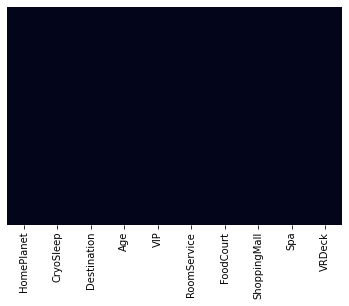

In [34]:
sns.heatmap(test.isnull(),yticklabels = False,cbar = False)

## Replace Categorical to a Number

In [35]:
train_drop.HomePlanet.replace('Earth', 0, inplace=True)
train_drop.HomePlanet.replace('Europa', 1, inplace=True)
train_drop.HomePlanet.replace('Mars', 2, inplace=True)

train_drop['CryoSleep'] = train_drop['CryoSleep'].map(int)
train_drop['VIP'] = train_drop['VIP'].map(int)
train_drop.Transported = train_drop.Transported.replace({True:0, False: 1})

In [36]:
train_drop.Destination.replace('TRAPPIST-1e', 0, inplace=True)
train_drop.Destination.replace('55 Cancri e',1, inplace=True)
train_drop.Destination.replace('PSO J318.5-22', 2, inplace=True)

In [37]:
train_drop.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,1
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,0


In [38]:
test.HomePlanet.replace('Earth', 0, inplace=True)
test.HomePlanet.replace('Europa', 1, inplace=True)
test.HomePlanet.replace('Mars', 2, inplace=True)

test['CryoSleep'] = test['CryoSleep'].map(int)
test['VIP'] = test['VIP'].map(int)

test.Destination.replace('TRAPPIST-1e', 0, inplace=True)
test.Destination.replace('55 Cancri e', 1, inplace=True)
test.Destination.replace('PSO J318.5-22', 2, inplace=True)

In [39]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,0,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,1,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,0,20.0,0,10.0,0.0,635.0,0.0,0.0


## Feature Scaling

In [40]:
train_drop.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,1
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,0


In [60]:
Y_train = data['Transported']

In [42]:
features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [43]:
X_train = train_drop[features]

In [44]:
X_test = test[features]

In [69]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

/home/gaurav/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [70]:
Y_pred = classifier.predict(X_test)

In [71]:
output = pd.DataFrame({'PassengerId': ID, 'Transported': Y_pred})
output.to_csv('submission.csv', index=False)

In [58]:
output.tail(10)

,PassengerId,Transported
4267,9260_01,0
4268,9262_01,0
4269,9263_01,0
4270,9265_01,0
4271,9266_01,0
4272,9266_02,0
4273,9269_01,0
4274,9271_01,0
4275,9273_01,0
4276,9277_01,0


In [59]:
# Gradient Boosting Algorithm

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=100, random_state=0)

In [61]:
model.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=100, random_state=0)

In [62]:
Y_predict = model.predict(X_test)

In [63]:
new_test = pd.read_csv('test.csv')

In [64]:
new_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [65]:
sub_id = new_test['PassengerId']

In [66]:
output_1 = pd.DataFrame({'PassengerId':sub_id, 'Transported':Y_predict})

In [67]:
ls

sample_submission.csv  submission_1.csv  test.csv
space_craft.ipynb      submission.csv    train.csv


In [68]:
output_1.to_csv('submission.csv', index=False)

In [ ]:
output_1